# Misure e distribuzioni di probabilità {#sec-prob-on-general-spaces}

**Prerequisiti**

- Leggi **Introduction to Probability** di Blitzstein e Hwang (2019). Focalizzati sui capitoli ...

**Concetti e competenze chiave**

**Preparazione del Notebook**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import itertools as it
import math
import random
import scipy.stats as stats
import arviz as az
import seaborn as sns
from collections import Counter

In [2]:
seed: int = sum(map(ord, "prob_on_general_spaces"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Nel @sec-prob-spaces abbiamo introdotto la teoria della misura e della probabilità su insiemi con un numero finito di elementi. Tuttavia, molti degli spazi matematici che incontriamo nelle applicazioni pratiche, come gli interi e la retta reale, non hanno un numero finito di elementi, ma piuttosto un numero numerabile infinito o addirittura non numerabile infinito di elementi. Sfortunatamente, estendere la teoria della misura e della probabilità a spazi più generali come questi non è sempre semplice.

Senza entrare nei dettagli, è stato dimostrato che la forma più generale della teoria della misura e della probabilità applicabile a qualsiasi spazio matematico è chiamata $\sigma$-algebra. In questo capitolo, forniremo un'introduzione intuitiva ai vincoli delle $\sigma$-algebre ed esamineremo alcune notevoli applicazioni. In particolare, introdurremo i concetti di variabile casuale, funzioni di massa di probabilità e funzioni di ripartizione.

Questi concetti sono fondamentali per comprendere come la probabilità e la misura possono essere utilizzate in contesti più complessi, permettendo di estendere le nostre analisi a insiemi infiniti e spazi continui, che sono comuni nelle applicazioni psicologiche.

## $\sigma$-Algebre

Una **$\sigma$-algebra** è una struttura matematica che permette di filtrare i sottoinsiemi di un insieme in modo coerente. È utilizzata per definire gli insiemi misurabili in uno spazio.

### Filtraggio dei Sottoinsiemi

Quando si filtra l'insieme delle parti di un insieme $X$, è importante che la collezione filtrata di sottoinsiemi sia chiusa rispetto a certe operazioni insiemistiche. In particolare, se un sottoinsieme $\mathsf{x} \subset X$ appartiene alla collezione filtrata, devono appartenervi anche:

1. **Il complemento**: Se $\mathsf{x} \in \mathcal{X}$, allora anche $\mathsf{x}^{c} \in \mathcal{X}$.
2. **L'unione numerabile**: Se $\mathsf{x}_1, \mathsf{x}_2, \ldots \in \mathcal{X}$, allora $\bigcup_{i=1}^{\infty} \mathsf{x}_i \in \mathcal{X}$.
3. **L'intersezione numerabile**: Se $\mathsf{x}_1, \mathsf{x}_2, \ldots \in \mathcal{X}$, allora $\bigcap_{i=1}^{\infty} \mathsf{x}_i \in \mathcal{X}$.

Queste proprietà assicurano che non ci siano "buchi" nella collezione filtrata, evitando la ricostruzione di sottoinsiemi esclusi.

## Definizione di $\sigma$-Algebra

Una **$\sigma$-algebra** è una collezione di sottoinsiemi di uno spazio $X$ che soddisfa le seguenti proprietà:

- **Chiusura rispetto al complemento**: Se un sottoinsieme $A$ appartiene alla $\sigma$-algebra $\mathcal{F}$, allora anche il suo complemento $A^c$ appartiene a $\mathcal{F}$. Questo significa che se $\mathcal{F}$ contiene un certo sottoinsieme, deve contenere anche tutti gli elementi che non sono in quel sottoinsieme.

- **Chiusura rispetto alle unioni numerabili**: Se una sequenza numerabile di sottoinsiemi $A_1, A_2, A_3, \ldots$ appartiene alla $\sigma$-algebra $\mathcal{F}$, allora anche l'unione di tutti questi sottoinsiemi appartiene a $\mathcal{F}$. Questo implica che se $\mathcal{F}$ contiene una serie di sottoinsiemi, deve contenere anche il loro insieme unito.

- **Inclusione dello spazio campionario**: Lo spazio campionario $X$ stesso deve appartenere alla $\sigma$-algebra $\mathcal{F}$. In altre parole, l'intero insieme $X$ è considerato un sottoinsieme misurabile.

La *chiusura* in questo contesto significa che la collezione $\mathcal{F}$ è stabile rispetto a determinate operazioni insiemistiche. In particolare, se si applicano le operazioni di complemento o di unione numerabile a elementi della $\sigma$-algebra, i risultati di queste operazioni rimarranno all'interno della stessa $\sigma$-algebra. Questo garantisce che la $\sigma$-algebra non "perda" elementi a causa di queste operazioni, mantenendo così la coerenza e la completezza della collezione di sottoinsiemi.

### Spazio Misurabile

Un insieme dotato di una $\sigma$-algebra, $(X, \mathcal{X})$, è detto **spazio misurabile**. Gli elementi di una $\sigma$-algebra sono noti come **sottoinsiemi misurabili**, mentre i sottoinsiemi non appartenenti alla $\sigma$-algebra sono detti **non misurabili**. La distinzione tra sottoinsiemi misurabili e non misurabili è cruciale per evitare comportamenti anomali e controintuitivi nella teoria della misura e della probabilità.
## Gli Assiomi di Kolmogorov

I tre assiomi di Kolmogorov definiscono le proprietà fondamentali di una misura di probabilità e richiedono l'esistenza di una $\sigma$-algebra.

1. **Non negatività**: Per qualsiasi evento $A$ nello spazio campionario $\Omega$, la probabilità di $A$ è non negativa.
   $$
   P(A) \geq 0.
   $$

2. **Normalizzazione**: La probabilità dell'intero spazio campionario $\Omega$ è 1.
   $$
   P(\Omega) = 1.
   $$

3. **Additività numerabile**: Per qualsiasi sequenza numerabile di eventi mutuamente esclusivi $A_1, A_2, A_3, \ldots$, la probabilità della loro unione è la somma delle loro probabilità.
   $$
   P\left(\bigcup_{i=1}^{\infty} A_i\right) = \sum_{i=1}^{\infty} P(A_i).
   $$

### Connessione tra gli Assiomi di Kolmogorov e le $\sigma$-Algebre

Gli assiomi di Kolmogorov sono definiti rispetto a una misura di probabilità $P$ su uno spazio campionario $\Omega$ e implicano l'esistenza di una $\sigma$-algebra $\mathcal{F}$. La $\sigma$-algebra $\mathcal{F}$ è la collezione di eventi (sottoinsiemi di $\Omega$) per i quali la misura di probabilità $P$ è definita.

1. **Non negatività** garantisce che $P$ assegni un valore non negativo a ogni evento nella $\sigma$-algebra.
2. **Normalizzazione** garantisce che $P(\Omega) = 1$, assicurando che $\Omega$ sia un elemento della $\sigma$-algebra.
3. **Additività numerabile** garantisce che la $\sigma$-algebra sia chiusa rispetto alle unioni numerabili di insiemi disgiunti.

In sintesi, gli assiomi di Kolmogorov richiedono una $\sigma$-algebra come struttura all'interno della quale queste proprietà valgono. La $\sigma$-algebra è quindi la collezione di eventi per i quali la misura di probabilità è ben definita e coerente con gli assiomi di Kolmogorov.

## Probabilità

Una volta definiti gli assiomi di Kolmogorov, è possibile introdurre la definizione di probabilità.

La **probabilità** di un evento è una misura numerica che indica la possibilità che tale evento si verifichi, in accordo con gli assiomi di Kolmogorov.

- Se $P(A) = 0$, l'evento $A$ è impossibile.
- Se $P(A) = 1$, l'evento $A$ è certo.

Per denotare la probabilità che un evento $A$ non si verifichi, si usa la notazione $P(A^c)$, dove:
$$
P(A^c) = 1 - P(A).
$$

### Proprietà Derivate dagli Assiomi di Kolmogorov

Alcune proprietà importanti derivate dagli assiomi includono:

- $P(\varnothing) = 0$,
- Se $A \subset B$, allora $P(A) \leq P(B)$,
- $0 \leq P(A) \leq 1$,
- $P(A^c) = 1 - P(A)$,
- Se $A \cap B = \varnothing$, allora $P(A \cup B) = P(A) + P(B)$.

### Regole di Addizione per Eventi

Per eventi non mutuamente esclusivi, la probabilità della loro unione è data da:
$$
P(A \cup B) = P(A) + P(B) - P(A \cap B).
$$

Utilizzando il terzo assioma della probabilità, si ottiene:
$$
P(A \cup B) = P(A \cap B^c) + P(B \cap A^c) + P(A \cap B).
$$

Quando $A$ e $B$ sono mutuamente esclusivi, $P(A \cap B) = 0$, e quindi:
$$
P(A \cup B) = P(A) + P(B).
$$

La legge della probabilità totale permette di scrivere:
$$
P(A) = P(A \cap B) + P(A \cap B^c),
$$
e analogamente per $B$:
$$
P(B) = P(B \cap A) + P(B \cap A^c).
$$

In conclusione, gli assiomi di Kolmogorov forniscono la base per definire la probabilità su una $\sigma$-algebra, garantendo che le proprietà fondamentali della probabilità siano rispettate e che la probabilità sia ben definita per una collezione coerente di sottoinsiemi.

## Probabilità e Calcolo Combinatorio

I problemi scolastici più comuni sulle probabilità richiedono l'uso del calcolo combinatorio. La struttura generale di questi problemi è sempre la stessa: dobbiamo contare il numero di modi in cui un evento compatibile con l'evento di "successo" definito dal problema si realizza e poi trovare la proporzione di tali eventi rispetto a tutti gli eventi possibili (inclusi quelli di "insuccesso") che possono verificarsi nello spazio campionario. Questi problemi presentano due difficoltà principali:

1. **Traduzione del problema**: Trasformare la descrizione verbale del problema in una formulazione matematica chiara, suddividendo gli eventi possibili nello spazio campionario in base alle condizioni di successo e insuccesso definite dal problema.
2. **Conteggio delle possibilità**: Contare il numero di successi e il numero totale di eventi.

Per risolvere questi problemi, dobbiamo utilizzare tecniche del calcolo combinatorio, come le permutazioni e le combinazioni, che ci permettono di contare in modo preciso il numero di possibilità.

Consideriamo un esempio semplice e intuitivo per chiarire il concetto. Supponiamo di avere una scatola con 10 palline numerate da 1 a 10. Vogliamo calcolare la probabilità di estrarre una pallina con un numero pari.

1. **Definizione degli eventi**: In questo caso, l'evento di "successo" è l'estrazione di una pallina con un numero pari.
   - Eventi di successo: {2, 4, 6, 8, 10}
   - Eventi totali: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

2. **Conteggio delle possibilità**:
   - Numero di eventi di successo: 5
   - Numero totale di eventi: 10

3. **Calcolo della probabilità**:
   $$
   P(\text{numero pari}) = \frac{\text{numero di eventi di successo}}{\text{numero totale di eventi}} = \frac{5}{10} = 0.5
   $$

Per problemi più complessi, come il calcolo della probabilità di ottenere una determinata combinazione di carte da un mazzo o di formare un particolare gruppo di persone da una popolazione più grande, utilizziamo strumenti del calcolo combinatorio. 

## Il Problema dei Fratelli Bernoulli

La soluzione dei problemi di probabilità non è sempre semplice e nella storia della matematica ci sono molti esempi di celebri matematici che hanno commesso errori. Uno di questi aneddoti riguarda Jakob Bernoulli, uno dei pionieri della teoria della probabilità.

Jakob Bernoulli si interessò al calcolo delle probabilità mentre cercava di formalizzare le leggi del caso nel suo libro "Ars Conjectandi", pubblicato postumo nel 1713. Uno dei problemi che affrontò riguardava il calcolo della probabilità di ottenere almeno una testa in 8 lanci di una moneta equa. Nonostante il suo approccio iniziale fosse corretto, Bernoulli commise un errore nel calcolo combinatorio durante il processo.

Per risolvere il problema di calcolare la probabilità di ottenere almeno una testa in 8 lanci, bisogna considerare la probabilità complementare, ovvero la probabilità di non ottenere alcuna testa (ottenere solo croci) in 8 lanci, e poi sottrarla da 1:

1. **Calcolo della probabilità complementare**: La probabilità di ottenere solo croci in un singolo lancio è $\frac{1}{2}$. La probabilità di ottenere solo croci in 8 lanci consecutivi è:
   $$
   \left(\frac{1}{2}\right)^8 = \frac{1}{256}.
   $$

2. **Calcolo della probabilità di ottenere almeno una testa**:
   $$
   P(\text{almeno una testa}) = 1 - P(\text{nessuna testa}) = 1 - \frac{1}{256} = \frac{255}{256}.
   $$

Jakob Bernoulli commise un errore nel calcolo combinatorio che lo portò a una soluzione errata. Egli sottostimò la probabilità di ottenere almeno una testa, probabilmente a causa di un errore nel conteggio delle possibili combinazioni di successi e insuccessi.

Questo errore fu successivamente corretto da altri matematici, tra cui suo nipote Daniel Bernoulli, che dimostrarono il metodo corretto per risolvere tali problemi utilizzando il calcolo combinatorio in modo appropriato.

La storia del calcolo combinatorio e della probabilità è ricca di aneddoti come quello di Jakob Bernoulli. Questi episodi evidenziano come i problemi di probabilità possano essere estremamente controintuitivi, anche per i grandi matematici. Oggi siamo in grado di risolvere molti di questi problemi grazie al lavoro e alle correzioni apportate dai matematici che ci hanno preceduto. La teoria della probabilità, come molte altre discipline scientifiche, è il frutto di un lungo processo di sviluppo e comprensione che ha richiesto tempo e sforzi considerevoli.

::: {#exm-}

Il problema dei compleanni, generalmente attribuito a Richard von Mises, è un noto esempio controintuitivo di calcolo delle probabilità che utilizza il calcolo combinatorio, in particolare le permutazioni. Il problema chiede quanti individui sono necessari affinché la probabilità che almeno due persone abbiano lo stesso compleanno superi il 50%, assumendo che ogni giorno dell'anno sia ugualmente probabile come compleanno. Sorprendentemente, la risposta è solo 23 persone, molto meno di quanto la maggior parte delle persone immagina.

Per risolvere il problema dei compleanni utilizzando le permutazioni, consideriamo la seguente relazione:

$$
P(\text{almeno due persone hanno lo stesso compleanno}) = 1 - P(\text{nessuno ha lo stesso compleanno}).
$$

Questa uguaglianza è valida perché l'evento "nessuno ha lo stesso compleanno" è il complemento dell'evento "almeno due persone hanno lo stesso compleanno". Pertanto, dobbiamo calcolare la probabilità che nessuno abbia lo stesso compleanno.

Sia $k$ il numero di persone. Per calcolare la probabilità che nessuno abbia lo stesso compleanno, dobbiamo contare il numero di modi in cui $k$ persone possono avere compleanni diversi. Poiché ogni compleanno è ugualmente probabile, possiamo usare le permutazioni per contare il numero di modi in cui $k$ compleanni unici possono essere disposti su 365 giorni:

$$
365P_k = \frac{365!}{(365 - k)!}.
$$

Dividiamo questo numero per il numero totale di elementi nello spazio campionario, che è il numero totale di modi in cui $k$ compleanni possono essere disposti su 365 giorni:

$$
365^k.
$$

Quindi, la probabilità che nessuno abbia lo stesso compleanno è:

$$
P(\text{nessuno ha lo stesso compleanno}) = \frac{365P_k}{365^k} = \frac{365!}{365^k (365 - k)!}.
$$

Usando questa formula, la probabilità che almeno due persone abbiano lo stesso compleanno è:

$$
P(\text{almeno due persone hanno lo stesso compleanno}) = 1 - \frac{365!}{365^k (365 - k)!}.
$$

In sintesi, calcolando questa probabilità, si scopre che bastano solo 23 persone affinché la probabilità che almeno due di loro abbiano lo stesso compleanno superi il 50%, un risultato sorprendente rispetto all'intuizione comune.

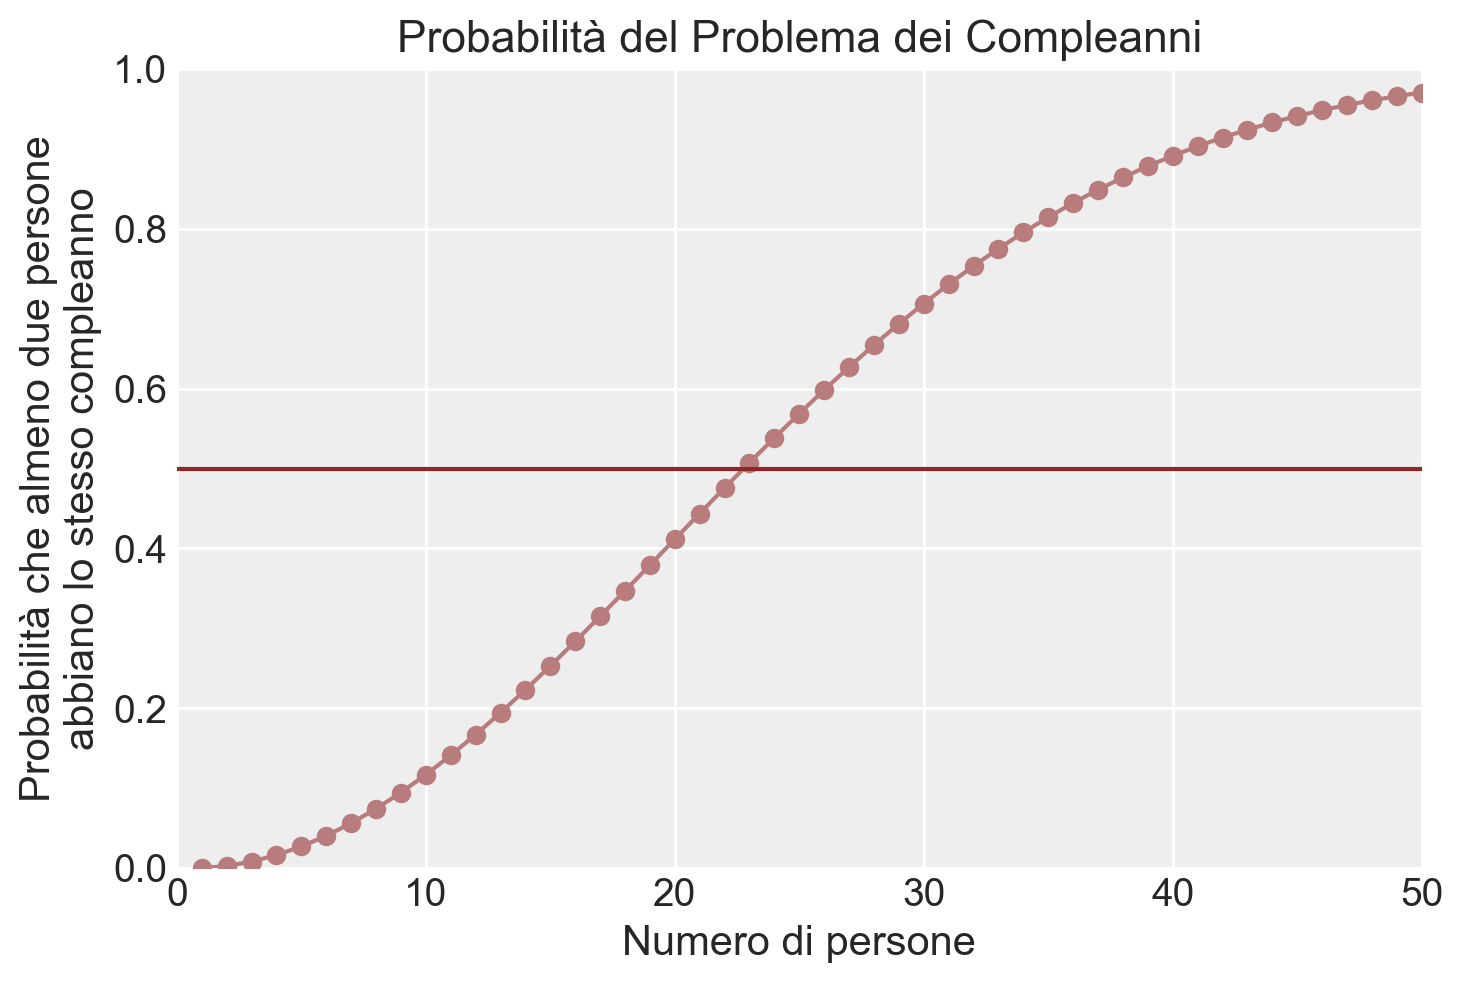

Probabilità per 20-25 persone: [0.41143838358049944, 0.44368833516523465, 0.47569530766240553, 0.507297234324024, 0.5383442579144757, 0.5686997039694264]


In [9]:
def birthday(k):
    logdenom = k * math.log(365) + math.lgamma(365 - k + 1) # log denominatore
    lognumer = math.lgamma(366) # log numeratore
    pr = 1 - np.exp(lognumer - logdenom) # trasformazione inversa
    return pr

k = np.arange(1, 51)
bday = [birthday(i) for i in k]

color_fill = "#b97c7c"
color_edge = "#8f2727"

plt.plot(k, bday, marker="o", color=color_fill)
plt.xlabel('Numero di persone')
plt.ylabel('Probabilità che almeno due persone\nabbiano lo stesso compleanno')
plt.axhline(
    y=0.5,
    color=color_edge,
    linestyle="-"
)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.grid(True)
plt.title('Probabilità del Problema dei Compleanni')
plt.show()

print("Probabilità per 20-25 persone:", bday[19:25])

Osserviamo che quando il numero di persone è 23, la probabilità che almeno due persone abbiano lo stesso compleanno supera 0.5. Quando il numero di persone è più di 50, questa probabilità è quasi 1.

:::

::: {#exm-}

Abbiamo derivato una soluzione analitica esatta per il problema dei compleanni, ma possiamo anche produrre una soluzione approssimata utilizzando il metodo della simulazione Monte Carlo. Il nome deriva dal Casinò di Monte Carlo a Monaco, ma possiamo semplicemente chiamarlo metodo di simulazione. La simulazione Monte Carlo è una classe generale di metodi stocastici (contrariamente ai metodi deterministici) che possono essere utilizzati per risolvere approssimativamente problemi analitici generando casualmente le quantità di interesse.

Per il problema dei compleanni, campioniamo $k$compleanni potenzialmente non unici su 365 giorni e verifichiamo se i $k$compleanni campionati sono tutti diversi. Utilizziamo il campionamento con reinserimento perché ad ogni estrazione ogni giorno dei 365 è ugualmente probabile, indipendentemente dai giorni estratti in precedenza. In altre parole, il fatto che una persona sia nata in un certo giorno dell'anno non esclude che qualcun altro possa essere nato lo stesso giorno. Dopo aver ripetuto questa procedura di campionamento molte volte, calcoliamo la frazione di prove di simulazione in cui almeno due compleanni sono uguali, e questa frazione serve come stima della probabilità corrispondente. Questa procedura di simulazione è intuitiva perché emula il processo di generazione dei dati descritto nel problema dei compleanni.

Per implementare il campionamento con o senza reinserimento in Python, utilizziamo la funzione `numpy.random.choice`. Nel caso del campionamento con reinserimento, impostiamo l'argomento `replace` su `True`. Il campionamento senza reinserimento significa che, una volta campionato un elemento, questo non sarà disponibile per estrazioni successive.

In [6]:
k = 23  # numero di persone
sims = 1000  # numero di simulazioni
event = 0  # contatore eventi

for _ in range(sims):
    days = np.random.choice(365, k, replace=True)
    unique_days = np.unique(days)
    if len(unique_days) < k:
        event += 1

# frazione di prove in cui almeno due compleanni sono uguali
answer = event / sims
print(f"Stima della probabilità: {answer}")

# Aumentare il numero di simulazioni a un milione per maggiore accuratezza
sims_large = 1000000
event_large = 0

for _ in range(sims_large):
    days = np.random.choice(365, k, replace=True)
    unique_days = np.unique(days)
    if len(unique_days) < k:
        event_large += 1

answer_large = event_large / sims_large
print(f"Stima con un milione di simulazioni: {answer_large}")

Stima della probabilità: 0.523
Stima con un milione di simulazioni: 0.50748


Nel codice sopra, abbiamo impostato il numero di simulazioni a 1000. Aumentando il numero di simulazioni a un milione, otteniamo una stima più accurata. Osserviamo che quando il numero di persone è 23, la probabilità che almeno due persone abbiano lo stesso compleanno è superiore a 0.5. Quando il numero di persone supera 50, questa probabilità è vicina a 1.

La simulazione Monte Carlo è una classe generale di procedure di campionamento casuale ripetuto utilizzate per risolvere approssimativamente problemi analitici. I metodi comunemente utilizzati includono il campionamento con reinserimento, in cui la stessa unità può essere campionata ripetutamente, e il campionamento senza reinserimento, in cui ogni unità può essere campionata al massimo una volta.
:::

::: {#exm-}

Supponiamo di dover formare una commissione di 5 psicologi su un gruppo di 20 persone (10 psicologi clinici e 10 psicologi del lavoro). Qual è la probabilità che almeno 2 psicologi clinici siano nella commissione? Per calcolare questa probabilità, utilizziamo la seguente uguaglianza:

$$
P(\text{almeno 2 psicologi clinici}) = 1 - P(\text{nessun psicologo clinico}) - P(\text{1 psicologo clinico}).
$$

Il numero totale di modi per selezionare 5 persone dal gruppo di 20 è dato da:

$$
\binom{20}{5} = \frac{20!}{5!(15!)} = 15,504.
$$

Il numero di modi per avere nessun psicologo clinico nella commissione (ovvero, selezionare solo psicologi del lavoro) è:

$$
\binom{10}{0} \times \binom{10}{5} = 1 \times 252 = 252.
$$

Quindi, la probabilità di avere nessun psicologo clinico è:

$$
P(\text{nessun psicologo clinico}) = \frac{252}{15,504} \approx 0.016.
$$

Il numero di modi per avere esattamente 1 psicologo clinico nella commissione è:

$$
\binom{10}{1} \times \binom{10}{4} = 10 \times 210 = 2,100.
$$

Quindi, la probabilità di avere esattamente 1 psicologo clinico è:

$$
P(\text{1 psicologo clinico}) = \frac{2,100}{15,504} \approx 0.135.
$$

La probabilità di avere almeno 2 psicologi clinici nella commissione è quindi:

$$
\begin{align}
P(\text{almeno 2 psicologi clinici}) &= 1 - P(\text{nessun psicologo clinico}) - P(\text{1 psicologo clinico}) \notag\\ 
&= 1 - 0.016 - 0.135 \notag\\ 
&= 0.849.\notag
\end{align}
$$

Quindi, la probabilità che almeno 2 psicologi clinici siano nella commissione è circa 0.849 o 84.9%.

Svolgiamo il problema in Python.

In [7]:
# Funzione per calcolare le combinazioni
def nCk(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Calcolo delle probabilità per il problema della commissione
total_ways = nCk(20, 5)
no_clinical = nCk(10, 0) * nCk(10, 5)
one_clinical = nCk(10, 1) * nCk(10, 4)

p_no_clinical = no_clinical / total_ways
p_one_clinical = one_clinical / total_ways

p_at_least_two_clinical = 1 - p_no_clinical - p_one_clinical

print(f"Probabilità di almeno 2 psicologi clinici: {p_at_least_two_clinical:.3f}")

Probabilità di almeno 2 psicologi clinici: 0.848


:::

## Commenti e considerazioni finali

La teoria delle probabilità è fondamentale per la statistica e ha numerose applicazioni pratiche, tra cui la psicologia. Comprendere le probabilità ci permette di prendere decisioni informate in situazioni incerte e di sviluppare previsioni affidabili. Una solida comprensione delle nozioni di base della probabilità ci consente di affrontare una vasta gamma di problemi e di prendere decisioni basate sulla probabilità dei risultati possibili. Tuttavia, è essenziale ricordare che i modelli probabilistici sono solo approssimazioni della realtà e possono essere influenzati da semplificazioni e limitazioni dei dati disponibili. Pertanto, è importante esercitare cautela nell'interpretazione dei risultati e comprendere le assunzioni alla base delle analisi.

## Informazioni sull'Ambiente di Sviluppo

In [9]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sat Jul 27 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

numpy     : 1.26.4
seaborn   : 0.13.2
pandas    : 2.2.2
scipy     : 1.14.0
matplotlib: 3.9.1
arviz     : 0.18.0

Watermark: 2.4.3

